In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,auc,roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the file
df=pd.read_csv('HR_Employee_Attrition_Data.csv')

In [4]:
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [ ]:
# There is no null values 

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,2940.0,NaN,NaN,NaN,36.92381,9.133819,18.0,30.0,36.0,43.0,60.0
Attrition,2940,2,No,2466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,2940,3,Travel_Rarely,2086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,2940.0,NaN,NaN,NaN,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
Department,2940,3,Research & Development,1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,2940.0,NaN,NaN,NaN,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
Education,2940.0,NaN,NaN,NaN,2.912925,1.023991,1.0,2.0,3.0,4.0,5.0
EducationField,2940,6,Life Sciences,1212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,2940.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,2940.0,NaN,NaN,NaN,1470.5,848.849221,1.0,735.75,1470.5,2205.25,2940.0


In [ ]:
# min,max,Q1,Q2,Q3 values are same in EmployeeCount and StandardHours numerical values.
# The count of Over18 caterical column is 1. So we are dropping the above 3 columns. Lets confirm with valuecounts() also

In [6]:
df['EmployeeCount'].value_counts()

1    2940
Name: EmployeeCount, dtype: int64

In [9]:
df['Over18'].value_counts()

Y    2940
Name: Over18, dtype: int64

In [135]:
df['StandardHours'].value_counts()

80    2940
Name: StandardHours, dtype: int64

In [3]:
# Removing above 3 features which has only 1 class in each of them
df=df.drop(['EmployeeCount','Over18','StandardHours'],axis=1)


In [11]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0


In [12]:
val=df['Attrition'].value_counts().sort_values(ascending=True).values
val[0]

474

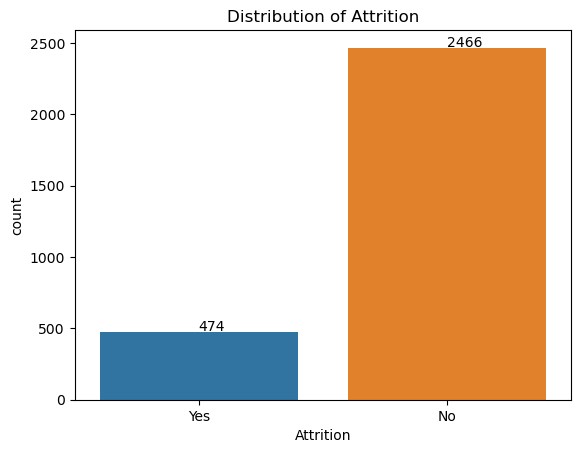

In [15]:
# Lets find the distribution of target column by graph
ax=sns.countplot(x='Attrition',data=df)
for i in range(df['Attrition'].nunique()):
     ax.text(i,val[i]+10,val[i])
plt.title('Distribution of Attrition')
plt.show()

In [ ]:
# Lets find the distribution of all categorical columns with Attrition column 

In [4]:
cat_index=df.select_dtypes(include='object').columns

----------- BusinessTravel -----------
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64


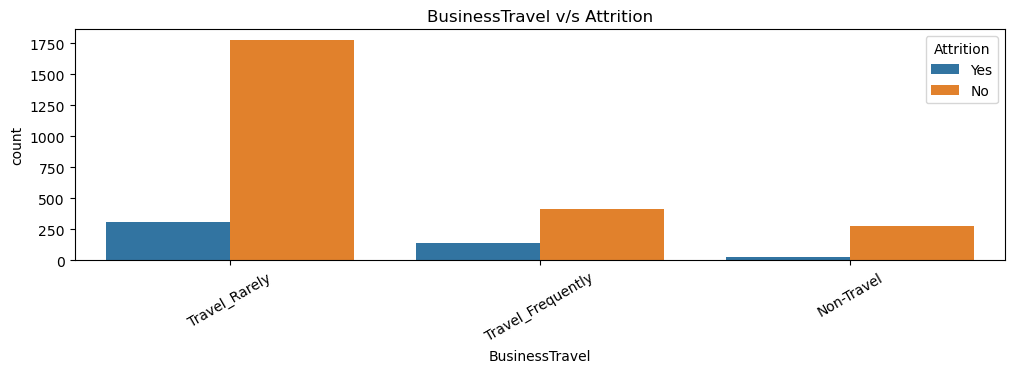

----------- Department -----------
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64


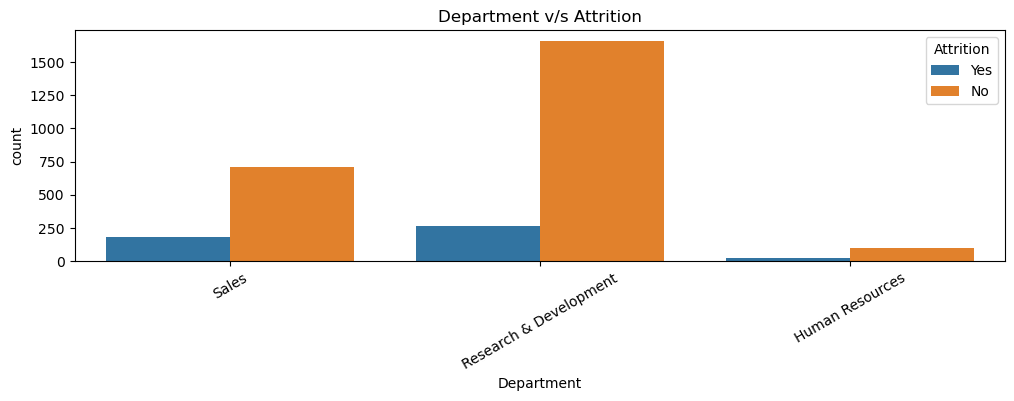

----------- EducationField -----------
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64


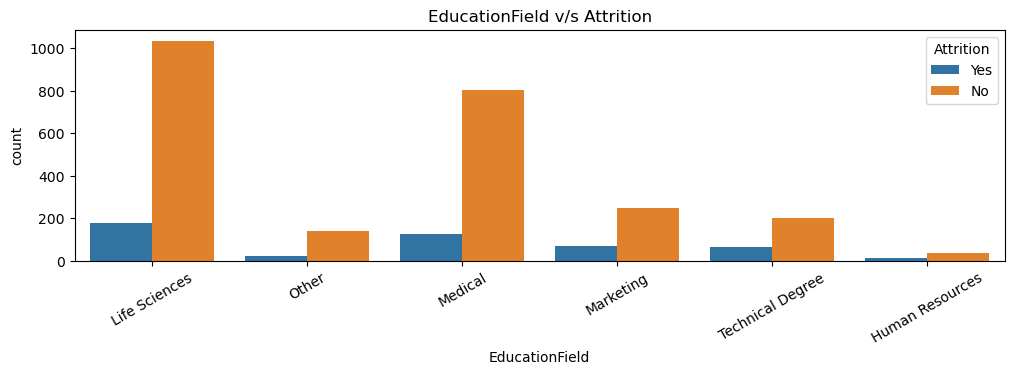

----------- Gender -----------
Male      1764
Female    1176
Name: Gender, dtype: int64


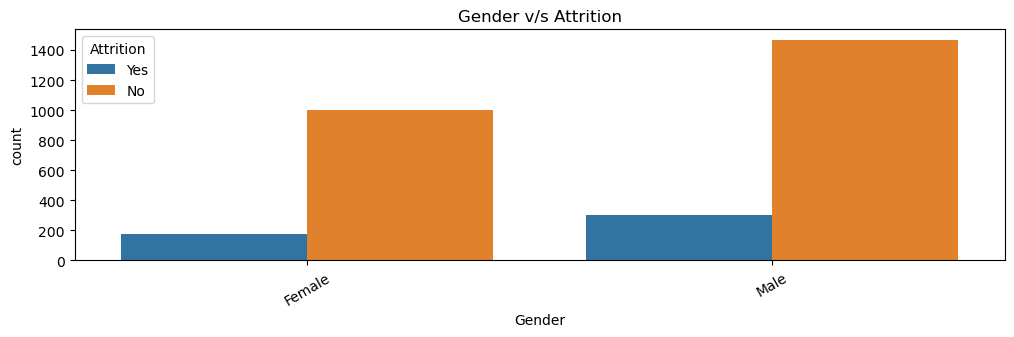

----------- JobRole -----------
Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64


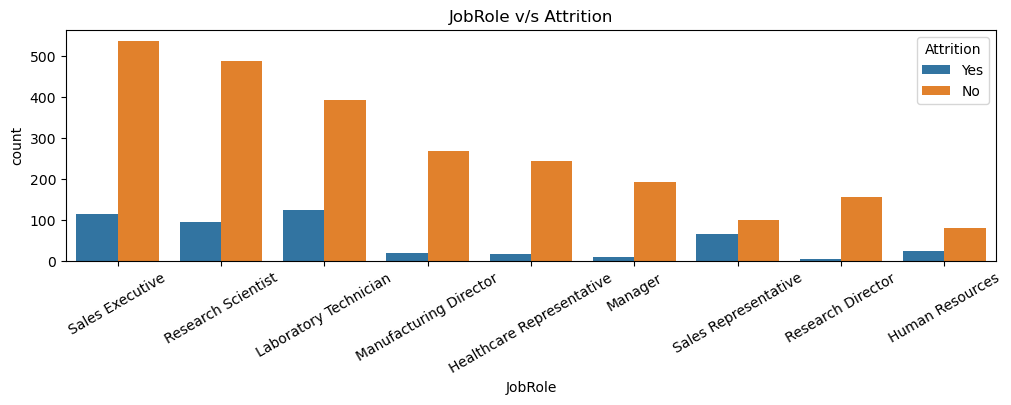

----------- MaritalStatus -----------
Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64


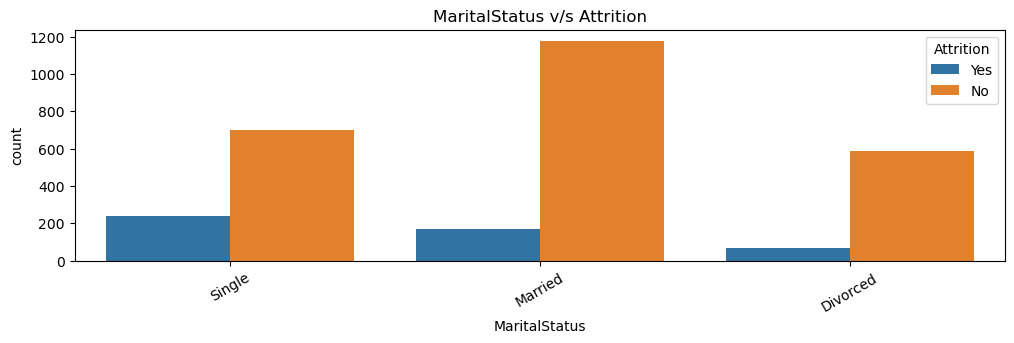

----------- OverTime -----------
No     2108
Yes     832
Name: OverTime, dtype: int64


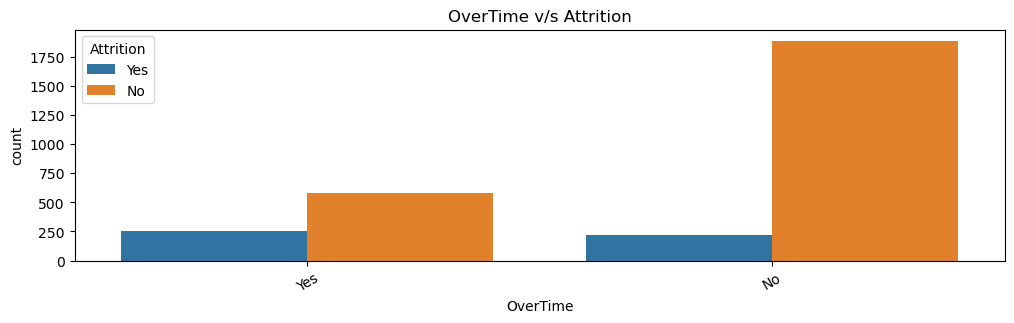

In [17]:
for i in cat_index[1:]:
    print('-----------',i,'-----------')
    print(df[i].value_counts(dropna=False))
    plt.figure(figsize=(12,3))
    
    sns.countplot(x=i,hue='Attrition',data=df)
    plt.title(f'{i} v/s Attrition')
    plt.xticks(rotation=30)
    plt.show()

### Observations

BusinnessTravel:
Travel_Rarely has the highest attrition rate and Non-Travel has the lowest attrition rate

Department:
R&D has the highest rate of attrition and HR has the lowest rate of attrition

EducationField
Life Sciences has the highest rate of attrition 

Gender
Male has the highest rate of attrition

JobRole
Lab Technician has the highest rate of attrition

MaritalStatus
Employess who are single has the highest rate of attrition

OverTime
Employees who does overtime work has the highest rate of attrition

In [ ]:
# Lets find the distribution and outliers of Numerical columns by boxplot

In [5]:
num_col=df.select_dtypes(exclude='object').columns
num_col,len(num_col)

(Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 24)

0 Age
1 DailyRate
2 DistanceFromHome
3 Education


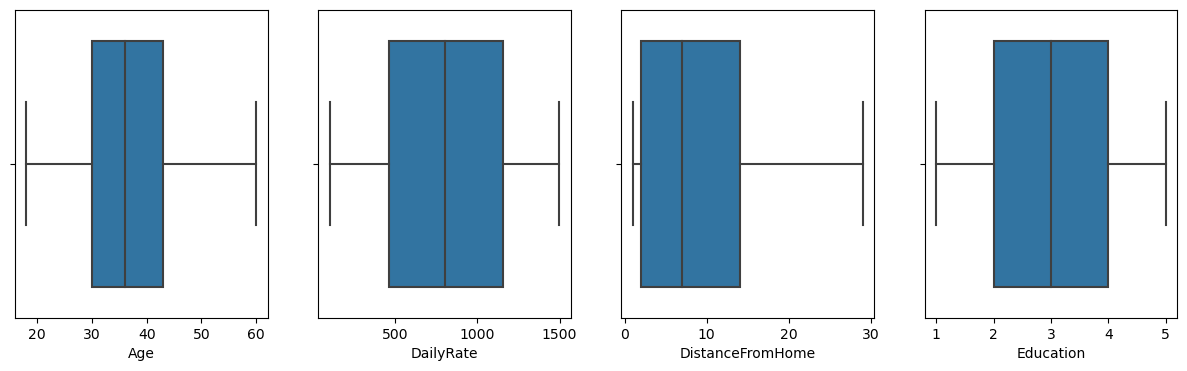

0 EmployeeNumber
1 EnvironmentSatisfaction
2 HourlyRate
3 JobInvolvement


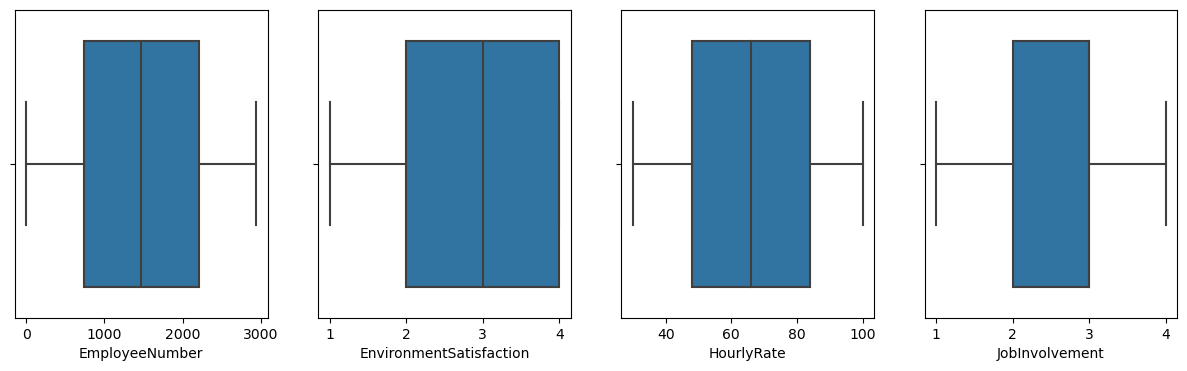

0 JobLevel
1 JobSatisfaction
2 MonthlyIncome
3 MonthlyRate


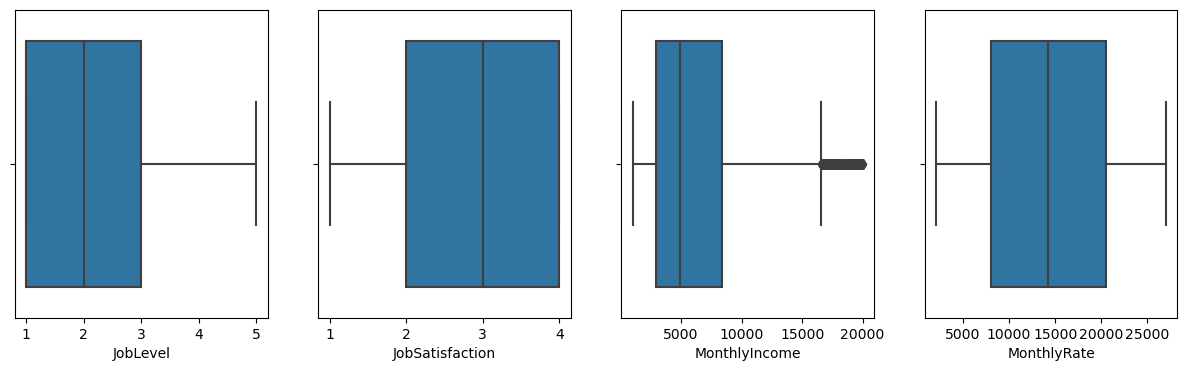

0 NumCompaniesWorked
1 PercentSalaryHike
2 PerformanceRating
3 RelationshipSatisfaction


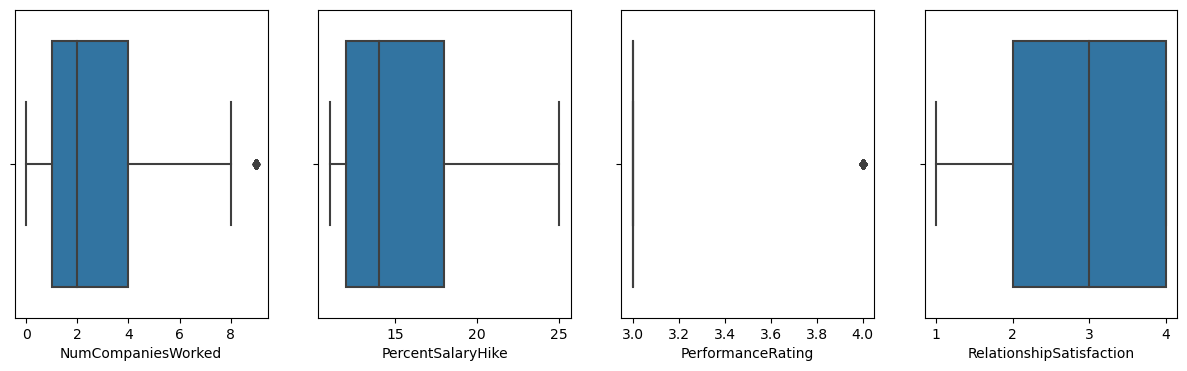

0 StockOptionLevel
1 TotalWorkingYears
2 TrainingTimesLastYear
3 WorkLifeBalance


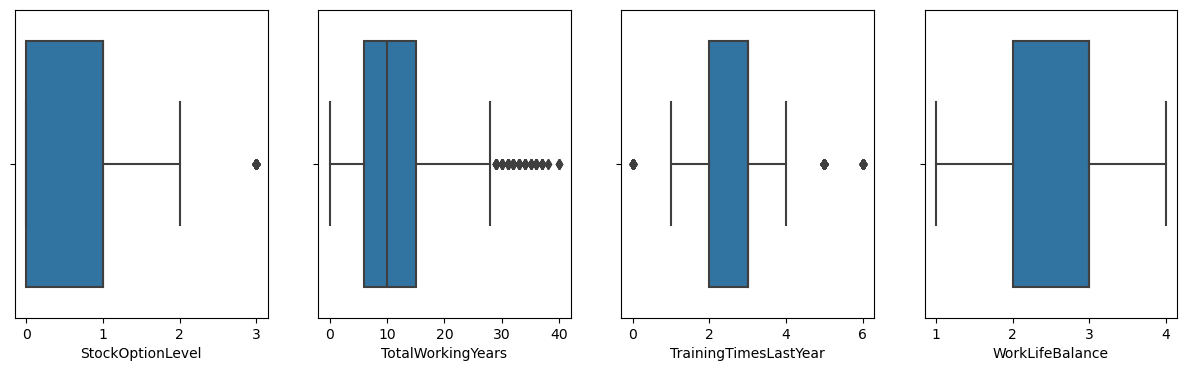

0 YearsAtCompany
1 YearsInCurrentRole
2 YearsSinceLastPromotion
3 YearsWithCurrManager


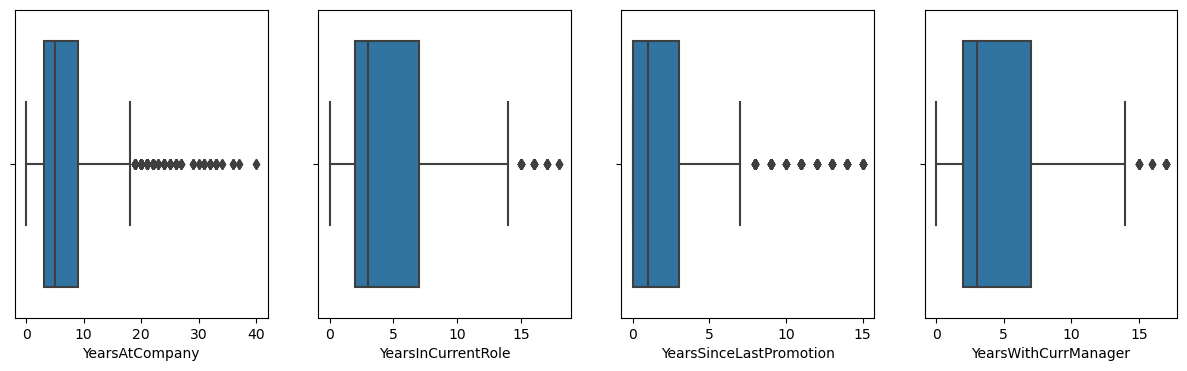

In [20]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(15,4))
for i in range(1):
    for j,k in enumerate(num_col[:4]):
        print(j,k)
        sns.boxplot(x=k,data=df,ax=ax[j])
    plt.show()

fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(15,4))

for i in range(1):
    for j,k in enumerate(num_col[4:8]):
        print(j,k)
        sns.boxplot(x=k,data=df,ax=ax[j])
    plt.show()

fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(15,4))

for i in range(1):
    for j,k in enumerate(num_col[8:12]):
        print(j,k)
        sns.boxplot(x=k,data=df,ax=ax[j])
    plt.show()
  
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(15,4))

for i in range(1):
    for j,k in enumerate(num_col[12:16]):
        print(j,k)
        sns.boxplot(x=k,data=df,ax=ax[j])
    plt.show()

fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(15,4))

for i in range(1):
    for j,k in enumerate(num_col[16:20]):
        print(j,k)
        sns.boxplot(x=k,data=df,ax=ax[j])
    plt.show()

fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(15,4))

for i in range(1):
    for j,k in enumerate(num_col[20:24]):
        print(j,k)
        sns.boxplot(x=k,data=df,ax=ax[j])
    plt.show()


In [ ]:
# Few columns have outliers. But we will take the outlier removal decision after further EDA

# Lets find the relation between all numerical columns with the Attrition feature

0 Age
1 DailyRate
2 DistanceFromHome
3 Education


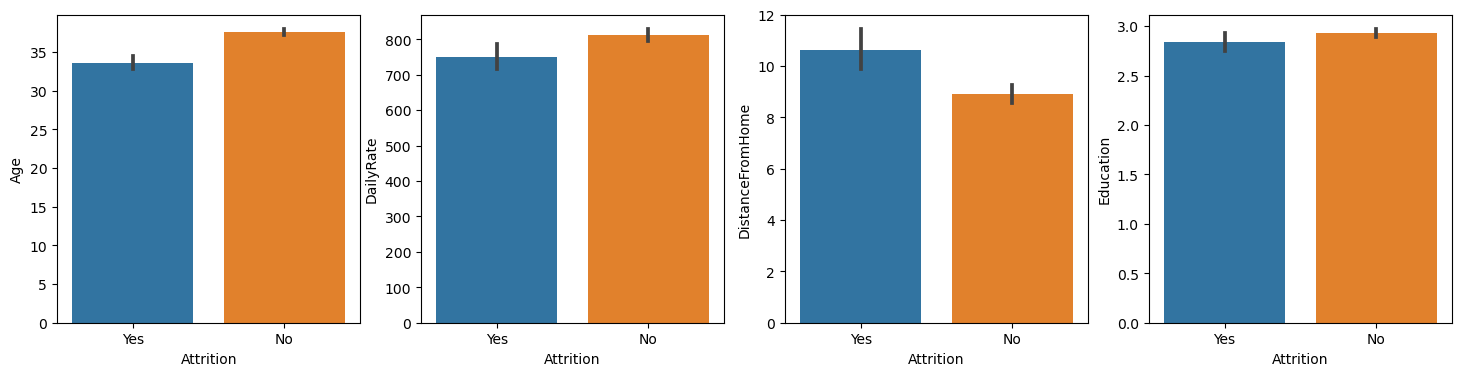

0 EmployeeNumber
1 EnvironmentSatisfaction
2 HourlyRate
3 JobInvolvement


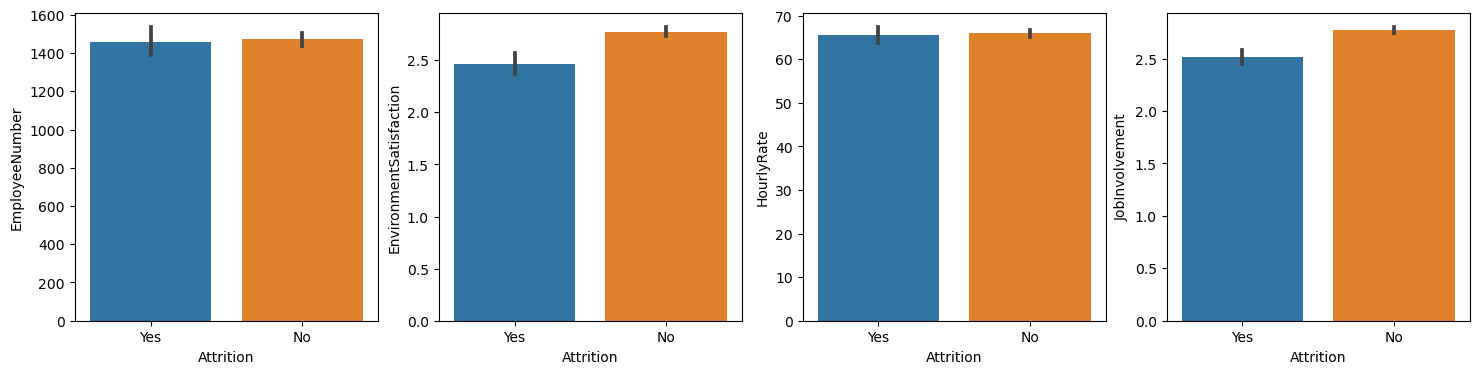

0 JobLevel
1 JobSatisfaction
2 MonthlyIncome
3 MonthlyRate


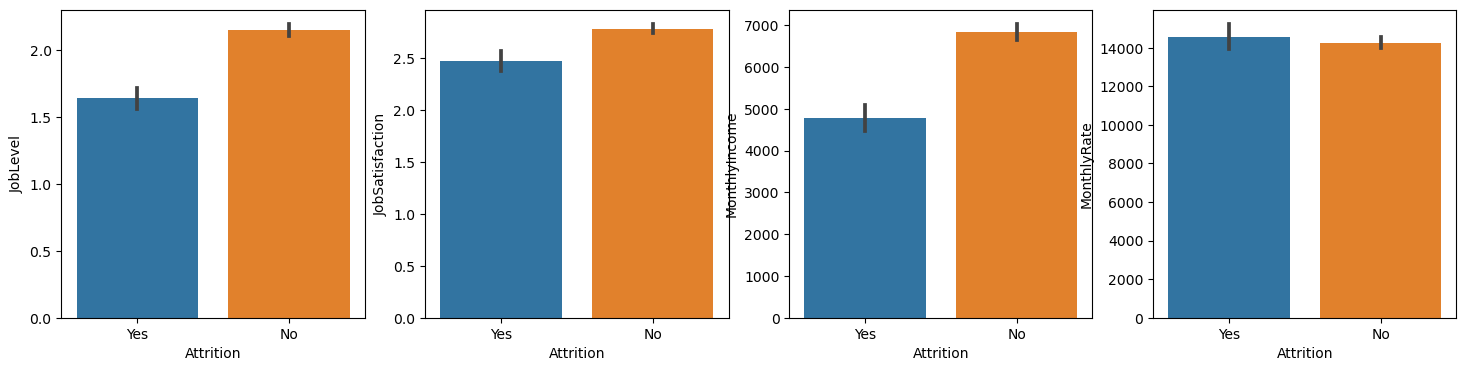

0 NumCompaniesWorked
1 PercentSalaryHike
2 PerformanceRating
3 RelationshipSatisfaction


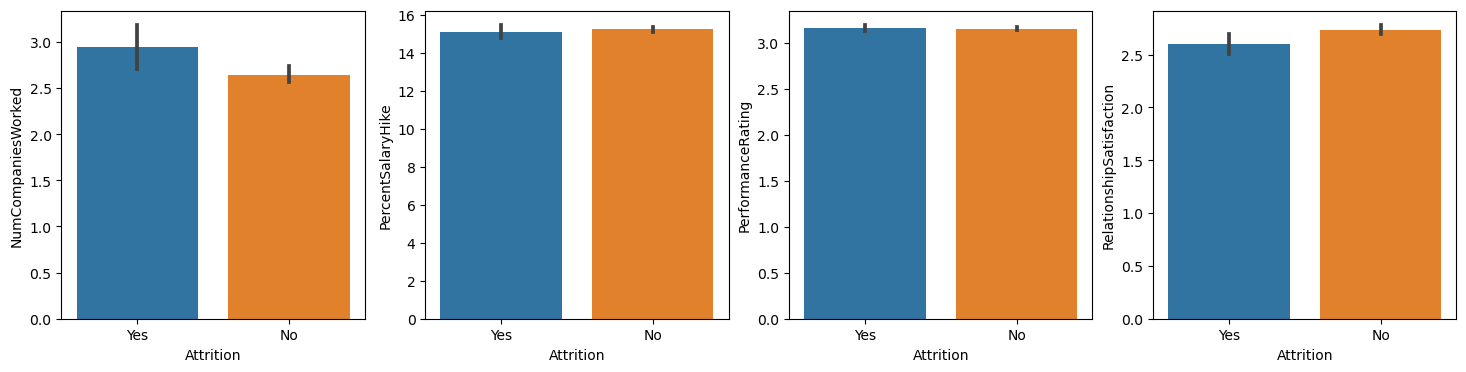

0 StockOptionLevel
1 TotalWorkingYears
2 TrainingTimesLastYear
3 WorkLifeBalance


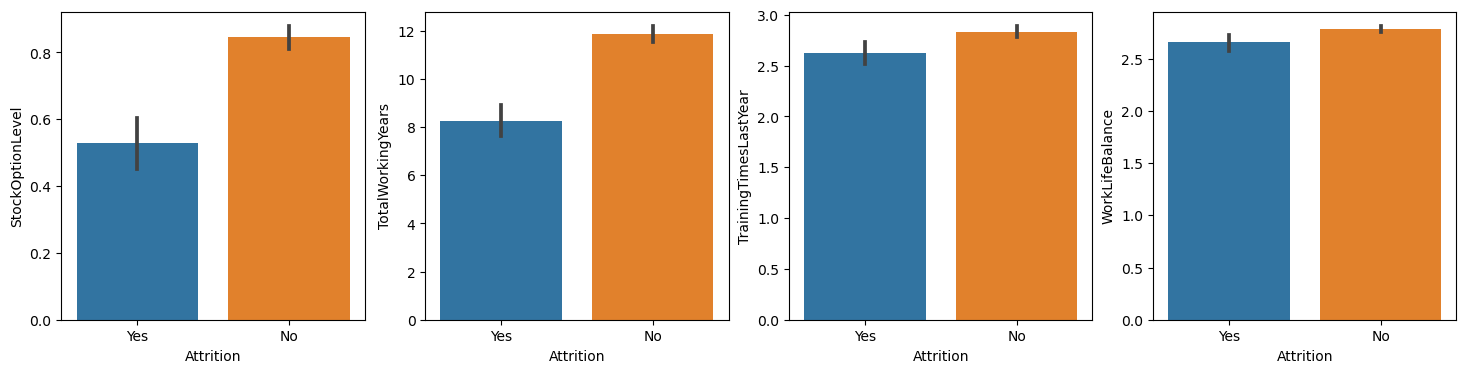

0 YearsAtCompany
1 YearsInCurrentRole
2 YearsSinceLastPromotion
3 YearsWithCurrManager


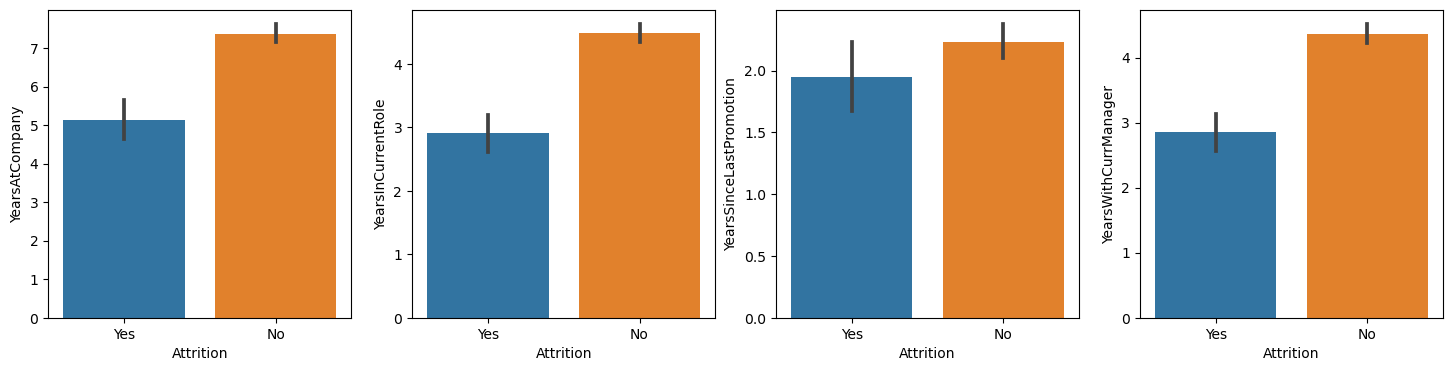

In [21]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(18,4))
for i in range(1):
    for j,k in enumerate(num_col[:4]):
        print(j,k)
        sns.barplot(y=k,x='Attrition',data=df,ax=ax[j])
    plt.show()

fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(18,4))

for i in range(1):
    for j,k in enumerate(num_col[4:8]):
        print(j,k)
        sns.barplot(y=k,x='Attrition',data=df,ax=ax[j])
    plt.show()

fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(18,4))

for i in range(1):
    for j,k in enumerate(num_col[8:12]):
        print(j,k)
        sns.barplot(y=k,x='Attrition',data=df,ax=ax[j])
    plt.show()
  
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(18,4))

for i in range(1):
    for j,k in enumerate(num_col[12:16]):
        print(j,k)
        sns.barplot(y=k,x='Attrition',data=df,ax=ax[j])
    plt.show()

fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(18,4))

for i in range(1):
    for j,k in enumerate(num_col[16:20]):
        print(j,k)
        sns.barplot(y=k,x='Attrition',data=df,ax=ax[j])
    plt.show()

fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(18,4))

for i in range(1):
    for j,k in enumerate(num_col[20:24]):
        print(j,k)
        sns.barplot(y=k,x='Attrition',data=df,ax=ax[j])
    plt.show()


## EmployeeNumber,HourlyRate,PercentSalaryHike,PerformanceRating features have no diff in distribution among attrition.This features can be dropped.

### Leseser age employees have higher attrition rate
### When distance from home increases,attrition rate increases
### Employees with less EnvironmentSatisfaction and JobEnvirnoment values is highly exposed to attrition
### Less JobLevel,JobSatisfaction and MonthlyIncome employees are highly exposed to attritionte
### Attrition rate is higher for employees who worked in NumCompaniesWorked
### Employees having lesser StockOptionLevel, TotalWorkingYears is highly exposed to attrition

In [6]:
# 'EmployeeNumber','HourlyRate','PercentSalaryHike','PerformanceRating' columns have almost equal distribution
# of 'Yes' and 'No' classes in the Attrition feature. So we are dropping those columns.

df=df.drop(['EmployeeNumber','HourlyRate','PercentSalaryHike','PerformanceRating'],axis=1)

In [23]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,19479,8,Yes,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,24907,1,No,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,23159,1,Yes,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,16632,9,No,4,1,6,3,3,2,2,2,2


In [25]:
df.shape

(2940, 28)

<Axes: >

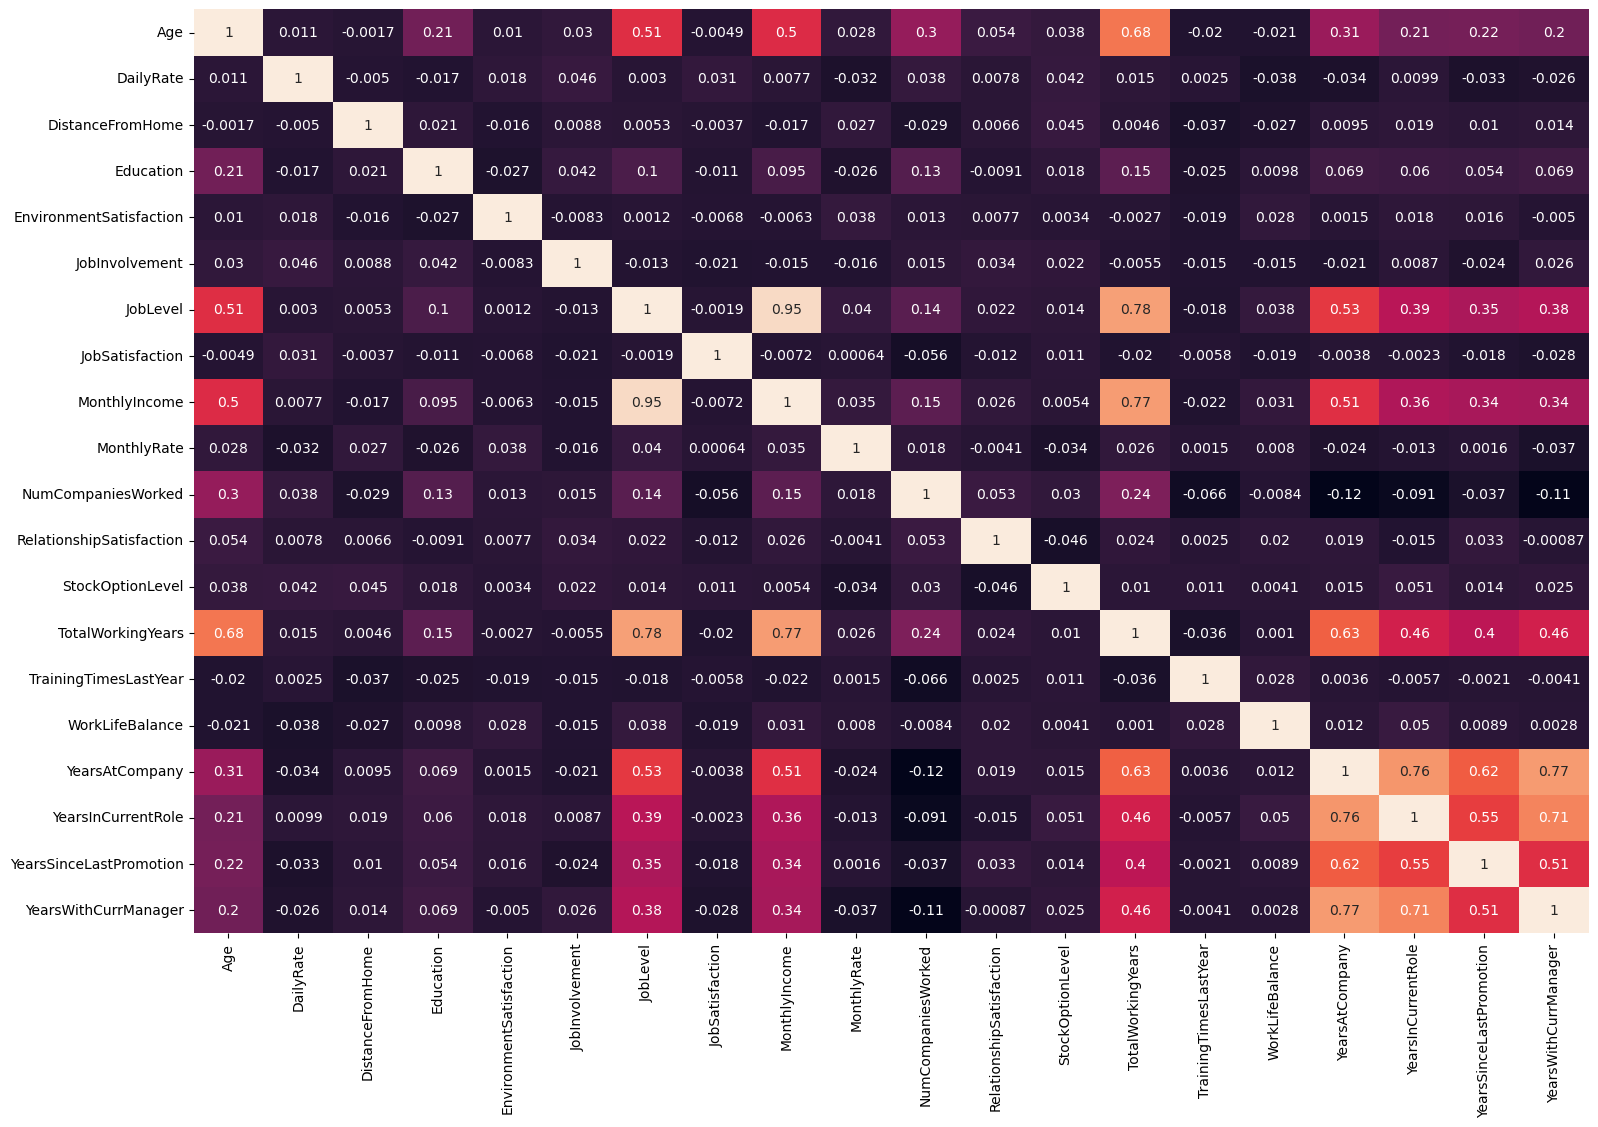

In [26]:
# Lets find the correlation of the data

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True,cbar=False)

In [30]:
# No correlation between 2 coulmns are highly stronger. So we are not removing any columns based on this.

In [38]:
# Lets see the unique values before encoding the categorical columns

for i in cat_index:
    print(i,'/',df[i].unique(),'/',df[i].nunique())
    print('---------------------------------------------------------------------------')

Attrition / ['Yes' 'No'] / 2
---------------------------------------------------------------------------
BusinessTravel / ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] / 3
---------------------------------------------------------------------------
Department / ['Sales' 'Research & Development' 'Human Resources'] / 3
---------------------------------------------------------------------------
EducationField / ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] / 6
---------------------------------------------------------------------------
Gender / ['Female' 'Male'] / 2
---------------------------------------------------------------------------
JobRole / ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] / 9
---------------------------------------------------------------------------
MaritalStatus / ['Single' 'Mar

In [39]:
# We are proceeding the dummies method

In [7]:
dummy=pd.get_dummies(df[cat_index])
dummy.columns

Index(['Attrition_No', 'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes'],
      dtype='object')

In [8]:
# We are removing the columns which has 2 unique values for column count reduction

dummy=dummy.drop(['Attrition_No','OverTime_No','Gender_Female'],axis=1)

In [9]:
# Lets concatenate the main data and dummy data

df1=pd.concat([df,dummy],axis=1)

In [43]:
df1.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,19479,8,Yes,1,0,8,0,1,6,4,0,5,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,24907,1,No,4,1,10,3,3,10,7,1,7,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,2,0,7,3,3,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1


In [10]:
# We are dropping the original categorical columns

df1=df1.drop(['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole',
             'MaritalStatus','OverTime'],axis=1)

In [27]:
df1.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,3,2,4,5993,19479,8,1,0,8,0,1,6,4,0,5,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
1,49,279,8,1,3,2,2,2,5130,24907,1,4,1,10,3,3,10,7,1,7,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,37,1373,2,2,4,2,1,3,2090,2396,6,2,0,7,3,3,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1


In [111]:
df1.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager

In [28]:
df1.shape

(2940, 47)

In [ ]:
# Lets seprate the independent variables and target variable for model preparation 

In [11]:
X=df1.drop('Attrition_Yes',axis=1)
y=df1['Attrition_Yes']

In [ ]:
# Lets split the training and testing the data

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Lets start modelling the data 

In [13]:
# RandomForestClassifier


In [20]:
rfc=RandomForestClassifier()

In [21]:
rfc.fit(X_train,y_train)

In [99]:
pred_rfc=rfc.predict(X_test)

In [56]:
# Evaluation metrics

In [23]:
acc_rfc=accuracy_score(y_test,pred_rfc)
acc_rfc

0.9727891156462585

In [65]:
confusion_matrix(y_test,pred_rfc)

array([[489,   0],
       [ 16,  83]], dtype=int64)

In [67]:
cm_rfc=confusion_matrix(y_test,pred_rfc)

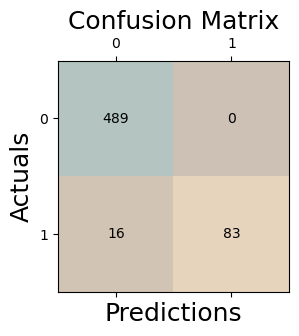

In [69]:
# Lets see the confusion matrix by visualization(0:False,1:True)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm_rfc, cmap=plt.cm.BrBG, alpha=0.3)
for i in range(cm_rfc.shape[0]):
    for j in range(cm_rfc.shape[1]):
        ax.text(x=j, y=i,s=cm_rfc[i, j], va='center', ha='center')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# We are predicting 489 times 0 as 0 and 83 times 1 as 1 with 97.27 accuracy.

In [71]:
# Lets check the classification report of RandomForestClassification also for recall and precision accuracy rates

print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       489
           1       1.00      0.84      0.91        99

    accuracy                           0.97       588
   macro avg       0.98      0.92      0.95       588
weighted avg       0.97      0.97      0.97       588



In [76]:
# Let us check the roc_auc_score between True positive rate and False positive rate
pred_prob=rdf.predict_proba(X_test)[:,1]

In [77]:
fpr,tpr,_=roc_curve(y_test,pred_prob)
roc_auc_score=auc(fpr,tpr)

In [80]:
fpr,tpr

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00408998,
        0.00408998, 0.00817996, 0.00817996, 0.01635992, 0.02862986,
        0.03067485, 0.0408998 , 0.04498978, 0.05316973, 0.05521472,
        0.06952965, 0.08588957, 0.09815951, 0.13087935, 0.17791411,
        0.20245399, 0.24539877, 0.29447853, 0.37218814, 0.44580777,
        0.53783231, 0.63803681, 0.7402863 , 0.84458078, 0.94478528,
        1.        ]),
 array([0.        , 0.01010101, 0.02020202, 0.08080808, 0.11111111,
        0.17171717, 0.19191919, 0.2020202 , 0.26262626, 0.28282828,
        0.34343434, 0.36363636, 0.42424242, 0.46464646, 0.47474747,
        0.53535354, 0.56565657, 0.64646465, 0.6969697 , 0.70707071,
        0.74747475, 0.7676

In [81]:
print('The ROC_AUC_Score between TPR and FPR is: ',roc_auc_score)

The ROC_AUC_Score between TPR and FPR is:  0.9947739150193138


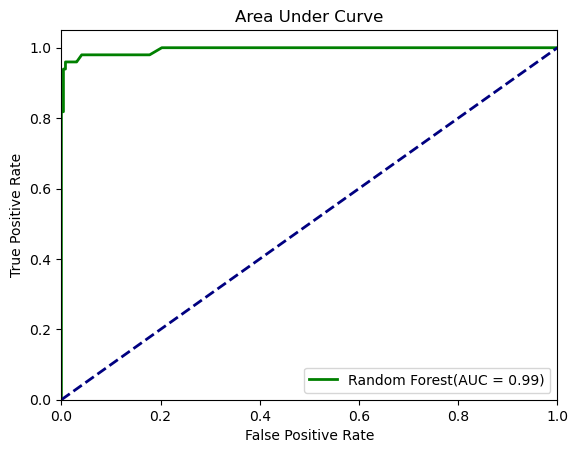

In [82]:
# Let us visualize the AUC_curve 

plt.figure(1)
lw = 2
plt.plot(fpr, tpr, color='green',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [38]:
# We need to scale the data as we are going to check accuracy with LogisticRegression,SVM,KNN classifier

In [42]:
ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [46]:
X_train_ss

array([[-0.66489731, -0.28351662, -0.27362471, ..., -0.92223175,
        -0.67419986, -0.63245553],
       [-0.33633681, -1.34515298,  1.44977131, ..., -0.92223175,
         1.4832397 , -0.63245553],
       [-0.22681664,  0.19545421, -0.76602357, ..., -0.92223175,
        -0.67419986, -0.63245553],
       ...,
       [-0.22681664, -0.13044347,  2.31146931, ...,  1.08432614,
        -0.67419986, -0.63245553],
       [ 0.43030437, -0.87852676, -0.51982414, ..., -0.92223175,
         1.4832397 , -0.63245553],
       [-1.65057882,  1.11883095, -0.76602357, ...,  1.08432614,
        -0.67419986,  1.58113883]])

In [ ]:
# Let us try modelling the data with LogisticRegression also to check the possibility of better accuracy

In [43]:
lr=LogisticRegression()

In [47]:
lr.fit(X_train_ss,y_train)

LogisticRegression()

In [48]:
lr_pred=lr.predict(X_test_ss)

In [49]:
lr_acc=accuracy_score(y_test,lr_pred)
lr_acc

0.9081632653061225

In [50]:
# SVM model

svm=SVC()

In [51]:
svm.fit(X_train_ss,y_train)

SVC()

In [53]:
svm_pred=svm.predict(X_test_ss)

In [85]:
svm_acc=accuracy_score(y_test,lr_pred)
svm_acc

0.9081632653061225

In [60]:
knn=KNeighborsClassifier(n_neighbors = 5)

In [61]:
knn.fit(X_train_ss,y_train)

KNeighborsClassifier()

In [62]:
knn_pred=knn.predict(X_test_ss)

In [63]:
knn_acc=accuracy_score(y_test,knn_pred)
knn_acc

0.8843537414965986

In [64]:
# lets compare the results of all the models to choose the best one

In [71]:
final_data=pd.DataFrame({'Model':['RFC','LR','SVM','KNN'],'Accuracy':[acc_rfc,lr_acc,svm_acc,knn_acc]})
final_data

,Model,Accuracy
0,RFC,0.972789
1,LR,0.908163
2,SVM,0.908163
3,KNN,0.884354


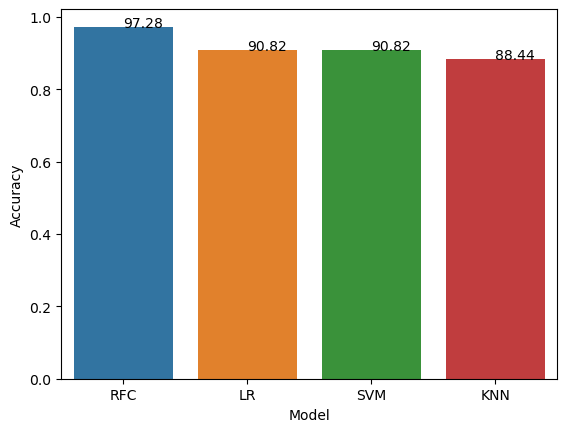

In [83]:
# Let us visualize the final data

ax=sns.barplot(x='Model',y='Accuracy',data=final_data)
for i in range(len(final_data)):
    ax.text(i,final_data.loc[i,'Accuracy'],round((final_data.loc[i,'Accuracy']*100),2))
    

In [84]:
# Based on the results, RandomForestClassifier gives the best accuracy. So we are finalizing the RFC model

In [100]:
file='emp_att_rate.pkl'

In [101]:
joblib.dump(rfc,file)

['emp_att_rate.pkl']

In [95]:
mod_rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}